# Introduction to Numerical Methods for Stochastic Differential Equations

### $\textbf{Author:}$ Alexandre Thyrion

__Content inspired from__:  Higham, D. J. (2001). *An algorithmic introduction to numerical simulation of stochastic differential equations*. SIAM Review, 43(3), 525–546.  
Available at: [https://epubs.siam.org/doi/10.1137/S0036144500378302](https://epubs.siam.org/doi/10.1137/S0036144500378302)

# TP2 : Stock Prices

Today, we will introduce an important application of Brownian Motion to model stock prices evolution, also called the **Black-Scholes Formula**, defined by the following SDE:
$$
dS(t) = \mu S(t)\,dt + \sigma S(t)\,dW(t), \quad S(0) = S_0
$$

where:  

- $ S(t)$ = stock price at time t
- $ \mu$= **drift rate** (expected return of the stock)  
- $ \sigma$ = **volatility** (standard deviation of returns, i.e. uncertainty)  
- $ W(t)$ = standard Wiener process (Brownian motion)  
- $ S_0 $= initial stock price  

## Intuition

- The **drift term** $ \mu S(t)\,dt $ captures the *deterministic growth* of the stock price over time.  
- The **diffusion term**  $ \sigma S(t)\,dW(t) $ captures the *random fluctuations* driven by market uncertainty.   


# Exercise 1 : Black-Scholes SDE

### **Q1** : Using the ITO-Formula, compute the analytical solution of the Black-Scholes SDE




### **Q2** : Simulate the Black-Scholes SDE using the Euler-Maruyama Method, and plot the solution for three different times steps against the analytical solution

Text(0, 0.5, 'X(t)')

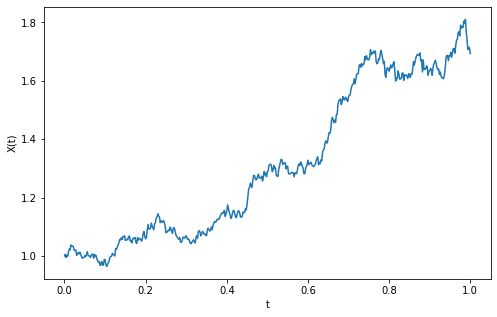

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def euler_maruyama_gbm(mu, sigma, X0, T, N):


    dt = T / N
    t = np.linspace(0, T, N+1)
    X = np.zeros( N+1)
    X[ 0] = X0

    for i in range(N):
        dW = np.sqrt(dt) * np.random.randn()
        X[ i+1] = X[ i] + mu* X[i] * dt + sigma * X[ i] * dW
    return t, X

mu = 0.5   # drift
sigma = 0.2      # volatility
X0 = 1.0      # initial value
T = 1.0       # final time
N = 500       # steps  # simulate multiple sample paths
t, X = euler_maruyama_gbm(mu, sigma, X0, T, N)

plt.figure(figsize=(8, 5))

plt.plot(t, X, lw=1.5)
plt.xlabel("t")
plt.ylabel("X(t)")


### **Q3** : Find the probability that S(2t) > 2S(t) for some t > 0

## Solution

The inequality is equivalent to  

$$
\exp \big( 2\mu t - \tfrac{1}{2}\sigma^2 t + \sigma W(2t) \big) 
> 2 \exp \big( \mu t - \tfrac{1}{2}\sigma^2 t + \sigma W(t) \big).
$$  

After rearranging this becomes  

$$
\exp \big( \sigma [ W(2t) - W(t) ] \big) 
> \exp \big( \ln 2 - \mu t + \tfrac{1}{2}\sigma^2 t \big).
$$  

which is equivalent to  

$$
W(2t) - W(t) > \frac{1}{\sigma}\Big( \ln 2 - \mu t + \tfrac{1}{2}\sigma^2 t \Big).
$$  

Writing $W(2t) - W(t) = \sqrt{t}\,X$, where $X \sim N(0,1)$, we can see that the probability of the above event is  

$$
1 - N\!\left( \frac{1}{\sigma\sqrt{t}}\Big( \ln 2 - \mu t + \tfrac{1}{2}\sigma^2 t \Big) \right),
$$  

where $N$ is the standard normal cumulative distribution function.


# Exercise 2 : From Euler–Maruyama to Milstein’s Method

In the previous practice session we saw that the **Euler–Maruyama (EM)** scheme has **strong order of convergence**  
$$
\gamma = \tfrac{1}{2},
$$  
whereas the deterministic Euler method converges with classical order $1$.  

This difference arises because stochastic differential equations involve a stochastic component modeled by Brownian motion.
To retrieve an order of convergence of 1, one must seek higher order methods. 
We present here one of them : The **Second Order Milstein Method**

## The Idea of the Second Order Milstein Method

This method shows that it is possible to raise the strong convergence order of Euler–Maruyama from $1/2$ to **$1$** by adding a ""**correction term**"" to the stochastic increment.  

This correction is derived from the **Itô–Taylor expansion**, which generalizes Taylor’s expansion to stochastic processes.


## Milstein Scheme

Consider the scalar SDE
$$
dX(t) = f(X(t))\,dt + g(X(t))\,dW(t),
$$
with initial condition $X(0) = X_0$.

As reminder, the **Euler–Maruyama scheme** updates the approximation as
$$
X_j = X_{j-1} + \Delta t\, f(X_{j-1}) + g(X_{j-1})\big(W(\tau_j)-W(\tau_{j-1})\big).
$$

The **Second order Milstein scheme** adds a second-order correction term:
$$
X_j = X_{j-1} 
+ \Delta t\, f(X_{j-1}) 
+ g(X_{j-1})\big(W(\tau_j)-W(\tau_{j-1})\big)
+ \tfrac{1}{2}\, g(X_{j-1})\, g'(X_{j-1}) \Big( (W(\tau_j)-W(\tau_{j-1}))^2 - \Delta t \Big),
\quad j=1,2,\dots,L.
$$

### **Q4** : Implement and Compare the second order Milstein method with the analytical solution, and the Euler-Maruyama method

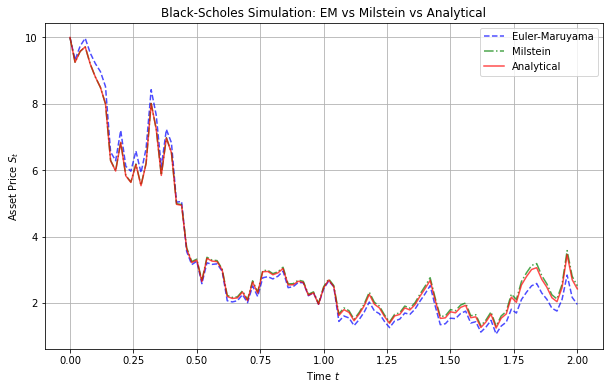

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Black-Scholes parameters
S0 = 10.0     # initial asset price
mu = .4    # drift
sigma = 1  # volatility
T = 2.0        # time horizon
N = 100      # number of time steps
dt = T / N

# Simulation parameters
M = 1         # number of sample paths to plot


# Time grid
t = np.linspace(0, T, N+1)

# Preallocate arrays
SEuler = np.zeros((M, N+1))
SMil = np.zeros((M, N+1))
SAnalytical = np.zeros((M, N+1))

# Initial condition
SEuler[:, 0] = S0
SMil[:, 0] = S0
SAnalytical[:, 0] = S0

# Generate Brownian increments
dW = np.sqrt(dt) * np.random.randn(M, N)
W = np.cumsum(dW, axis=1)
W = np.hstack([np.zeros((M,1)), W])  # include W_0 = 0

# Simulation loop
for n in range(N):
    # Euler-Maruyama
    SEuler[:, n+1] = SEuler[:, n] + mu*SEuler[:, n]*dt + sigma*SEuler[:, n]*dW[:, n]
    
    # Milstein
    SMil[:, n+1] = (SMil[:, n] 
                     + mu*SMil[:, n]*dt 
                     + sigma*SMil[:, n]*dW[:, n] 
                     + 0.5*sigma**2*SMil[:, n]*(dW[:, n]**2 - dt))
    
    # Analytical solution
    SAnalytical[:, n+1] = S0 * np.exp((mu - 0.5*sigma**2)*t[n+1] + sigma*W[:, n+1])

# Plot
plt.figure(figsize=(10,6))
for i in range(M):
    plt.plot(t, SEuler[i], 'b--', alpha=0.7, label='Euler-Maruyama' if i==0 else "")
    plt.plot(t, SMil[i], 'g-.', alpha=0.7, label='Milstein' if i==0 else "")
    plt.plot(t, SAnalytical[i], 'r-', alpha=0.7, label='Analytical' if i==0 else "")

plt.xlabel('Time $t$')
plt.ylabel('Asset Price $S_t$')
plt.title('Black-Scholes Simulation: EM vs Milstein vs Analytical')
plt.legend()
plt.grid(True)
plt.show()


### **Q5** : Show numerically that the second order Milstein method has strong order of convergence of 1

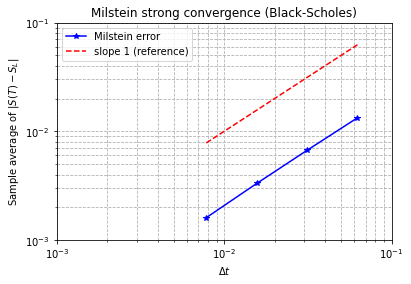

Estimated strong convergence rate q = 1.017
Residual of fit = 1.79e-02


In [47]:
import numpy as np
import matplotlib.pyplot as plt



T = 1.0        # time horizon
N = 2**11      # fine time steps
dt = T / N

# Simulation parameters
M = 500                     # number of sample paths
R = np.array([1, 16, 32, 64, 128])  # refinement factors

# Fix random seed
np.random.seed(100)

# Discretized Brownian path
dW = np.sqrt(dt) * np.random.randn(M, N)

# Preallocate Milstein results
Smil = np.zeros((M, len(R)))

# Loop over refinements
for p, Rp in enumerate(R):
    Dt = Rp * dt           # Milstein timestep
    L = N // Rp            # number of large steps
    Stemp = np.full(M, X0) # initial condition for all paths

    for j in range(L):
        # Brownian increments over each large timestep
        Winc = np.sum(dW[:, Rp*j : Rp*(j+1)], axis=1)

        Stemp = (Stemp 
                 + Dt * mu * Stemp 
                 + sigma * Stemp * Winc 
                 + 0.5 * sigma**2 * Stemp * (Winc**2 - Dt))

    Smil[:, p] = Stemp  # store Milstein solution at T

# Reference solution: smallest step (R=1)
Sref = Smil[:, 0]

# Errors for larger steps
Serr = np.abs(Smil[:, 1:] - Sref[:, None])
mean_err = np.mean(Serr, axis=0)

# Timesteps used
Dtvals = dt * R[1:]

# Plot strong error
plt.figure(figsize=(6,4))
plt.loglog(Dtvals, mean_err, 'b*-', label='Milstein error')
plt.loglog(Dtvals, Dtvals, 'r--', label='slope 1 (reference)')
plt.axis([1e-3, 1e-1, 1e-3, 1e-1])
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'Sample average of $|S(T) - S_L|$')
plt.title('Milstein strong convergence (Black-Scholes)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Least squares fit: log(error) = log(C) + q log(Δt)
A = np.vstack([np.ones(len(Dtvals)), np.log(Dtvals)]).T
rhs = np.log(mean_err)
sol, _, _, _ = np.linalg.lstsq(A, rhs, rcond=None)
q = sol[1]
resid = np.linalg.norm(A @ sol - rhs)

print(f"Estimated strong convergence rate q = {q:.3f}")
print(f"Residual of fit = {resid:.2e}")
